In [4]:
import pandas as pd

data = {
    'Name': ['Gourmet', 'Celebrity', 'Roar', 'Skin', 'Sentiment', 'Football', 'Button', 'Hair', 'Factor'],
    'Visual':       [4, 5, 2, 4, 1, 5, 4, 5, 1],
    'Auditory':     [2, 4, 5, 1, 2, 4, 2, 1, 1],
    'Gustatory':    [5, 1, 1, 1, 1, 1, 1, 1, 1],
    'Olfactory':    [5, 1, 1, 1, 1, 2, 1, 4, 1],
    'Tactile':      [3, 2, 2, 5, 2, 4, 5, 5, 1],
    'Interoceptive':[4, 3, 4, 5, 5, 4, 2, 3, 4],
    'Leg/Foot':     [1, 1, 1, 5, 1, 5, 1, 2, 1],
    'Hand/Arm':     [3, 2, 1, 5, 1, 3, 5, 4, 1],
    'Mouth/Throat': [5, 3, 5, 3, 2, 1, 1, 2, 1],
    'Head':         [3, 4, 5, 5, 4, 2, 1, 5, 3],
    'Torso':        [2, 2, 3, 5, 3, 3, 1, 2, 1]
}

df = pd.DataFrame(data)

print(df)


        Name  Visual  Auditory  Gustatory  Olfactory  Tactile  Interoceptive  \
0    Gourmet       4         2          5          5        3              4   
1  Celebrity       5         4          1          1        2              3   
2       Roar       2         5          1          1        2              4   
3       Skin       4         1          1          1        5              5   
4  Sentiment       1         2          1          1        2              5   
5   Football       5         4          1          2        4              4   
6     Button       4         2          1          1        5              2   
7       Hair       5         1          1          4        5              3   
8     Factor       1         1          1          1        1              4   

   Leg/Foot  Hand/Arm  Mouth/Throat  Head  Torso  
0         1         3             5     3      2  
1         1         2             3     4      2  
2         1         1             5     5     

ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of labels (10).

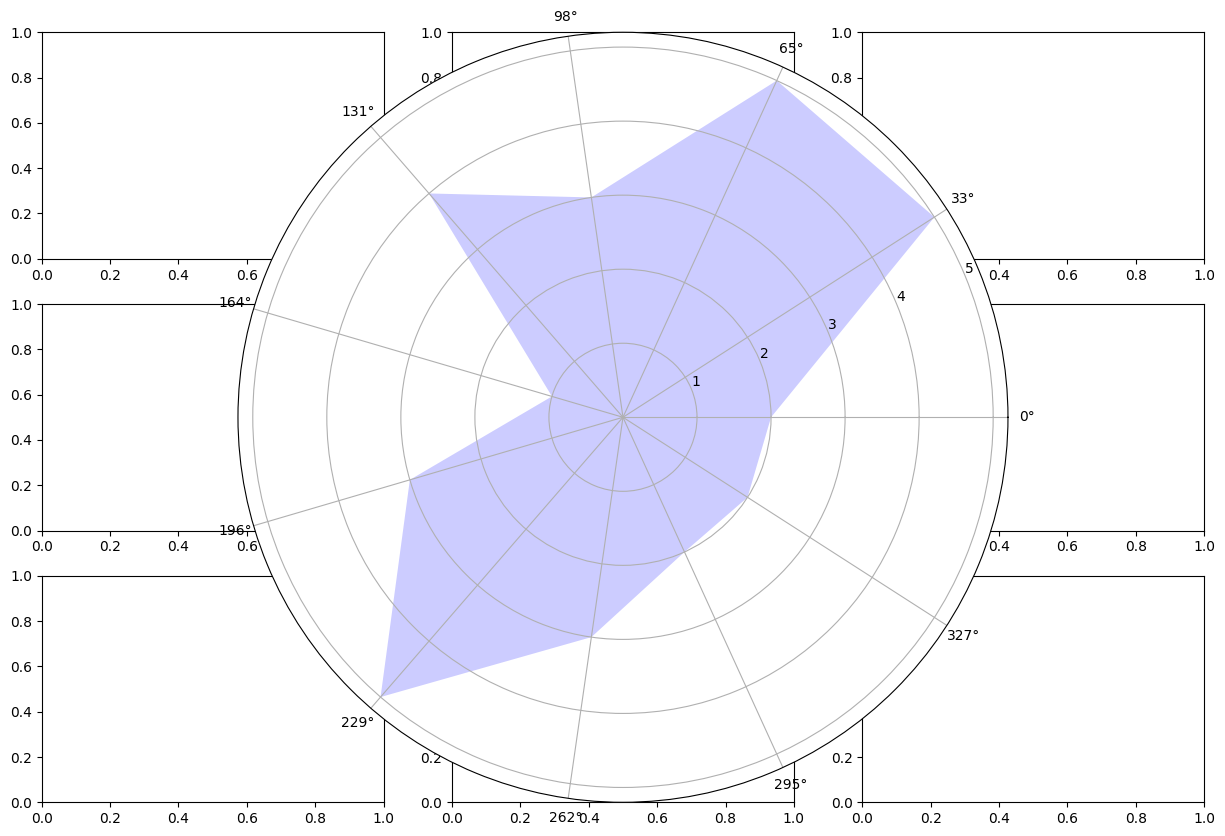

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
data = {
    'Name': ['Gourmet', 'Celebrity', 'Roar', 'Skin', 'Sentiment', 'Football', 'Button', 'Hair', 'Factor'],
    'Visual': [4, 5, 2, 4, 1, 5, 4, 5, 1],
    'Auditory': [2, 4, 5, 1, 2, 4, 2, 1, 1],
    'Gustatory': [5, 1, 1, 1, 1, 1, 1, 1, 1],
    'Olfactory': [5, 1, 1, 1, 1, 2, 1, 4, 1],
    'Tactile': [3, 2, 2, 5, 2, 4, 5, 5, 1],
    'Interoceptive': [4, 3, 4, 5, 5, 4, 2, 3, 4],
    'Leg/Foot': [1, 1, 1, 5, 1, 5, 1, 2, 1],
    'Hand/Arm': [3, 2, 1, 5, 1, 3, 5, 4, 1],
    'Mouth/Throat': [5, 3, 5, 3, 2, 1, 1, 2, 1],
    'Head': [3, 4, 5, 5, 4, 2, 1, 5, 3],
    'Torso': [2, 2, 3, 5, 3, 3, 1, 2, 1]
}

df = pd.DataFrame(data)

# Create subplots for each word
words = df['Name']
num_words = len(words)

# Define the number of subplots (facets) per row
subplots_per_row = 3
num_rows = -(-num_words // subplots_per_row)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(15, 10))

# Flatten the axes array if there's only one row
if num_rows == 1:
    axes = [axes]

# Loop through words and create polar plots
for i, word in enumerate(words):
    row = i // subplots_per_row
    col = i % subplots_per_row
    ax = axes[row][col]

    # Extract the ratings for the word
    ratings = df.loc[df['Name'] == word].iloc[:, 2:].values.flatten()

    # Duplicate the first rating (Visual) at the end to close the circular plot
    ratings = np.append(ratings, ratings[0])

    # Create a list of angles for the polar plot
    angles = np.linspace(0, 2 * np.pi, len(ratings), endpoint=False)

    # Plot the data as a polar plot
    ax = plt.subplot(projection='polar')
    ax.fill(angles, ratings, 'b', alpha=0.2)
    ax.set_xticks(angles)
    ax.set_xticklabels(df.columns[2:], fontsize=10)
    ax.set_title(word, va='bottom')

# Remove any empty subplots
for i in range(num_words, num_rows * subplots_per_row):
    fig.delaxes(axes[i // subplots_per_row][i % subplots_per_row])

plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
import plotly.subplots as sp
import plotly.graph_objs as go
import numpy as np

# Your dataset
data = {
    'Name': ['Gourmet', 'Celebrity', 'Roar', 'Skin', 'Sentiment', 'Football', 'Button'],
    'Visual': [4, 5, 2, 4, 1, 5, 4],
    'Auditory': [2, 4, 5, 1, 2, 4, 2],
    'Gustatory': [5, 1, 1, 1, 1, 1, 1],
    'Olfactory': [5, 1, 1, 1, 1, 2, 1],
    'Tactile': [3, 2, 2, 5, 2, 4, 5],
    'Interoceptive': [4, 3, 4, 5, 5, 4, 2]
}

df = pd.DataFrame(data)

# Set up the subplots
words = df['Name']
num_words = len(words)
cols = 2  # Number of columns of subplots
rows = int(np.ceil(num_words / cols))  # Number of rows of subplots

fig = sp.make_subplots(rows=rows, cols=cols, subplot_titles=words)

# Create a subplot for each word
for i, word in enumerate(words):
    row = i // cols + 1
    col = i % cols + 1

    # Get the ratings for the current word
    ratings = df.iloc[i, 1:]

    # Duplicate the first rating (Visual) at the end to close the circular plot
    ratings = np.append(ratings, ratings[0])

    # Create a list of angles for the polar plot
    angles = np.linspace(0, 2 * np.pi, len(ratings), endpoint=False)

    # Add the polar plot to the figure
    fig.add_trace(go.Barpolar(
        r=ratings,
        theta=angles,
        name=word,
        opacity=0.8
    ), row=row, col=col)

fig.update_layout(
    title='Sensorimotor and Action Effector Ratings for Different Words',
    polar=dict(
        radialaxis=dict(range=[0, 5], showticklabels=True, ticks=''),
        angularaxis=dict(showticklabels=True, ticks=np.linspace(0, 2 * np.pi, len(df.columns[1:]), endpoint=False),
                          tickvals=np.linspace(0, 2 * np.pi, len(df.columns[1:]), endpoint=False),
                          ticktext=df.columns[1:])
    )
)

fig.update_layout(showlegend=False)  # Hide the legend

fig.show()


C:\Users\gparti\AppData\Local\Temp\ipykernel_2924\2982552362.py:36: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



ValueError: Trace type 'barpolar' is not compatible with subplot type 'xy'
at grid position (1, 1)

See the docstring for the specs argument to plotly.subplots.make_subplots
for more information on subplot types

In [11]:
import plotly.graph_objects as go

fig = go.Figure(go.Barpolar(
    r=[3.5, 1.5, 2.5, 4.5, 4.5, 4, 3],
    theta=[65, 15, 210, 110, 312.5, 180, 270],
    width=[20,15,10,20,15,30,15,],
    marker_color=["#E4FF87", '#709BFF', '#709BFF', '#FFAA70', '#FFAA70', '#FFDF70', '#B6FFB4'],
    marker_line_color="black",
    marker_line_width=2,
    opacity=0.8
))

fig.update_layout(
    template=None,
    polar = dict(
        radialaxis = dict(range=[0, 5], showticklabels=False, ticks=''),
        angularaxis = dict(showticklabels=False, ticks='')
    )
)

fig.show()

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (6).

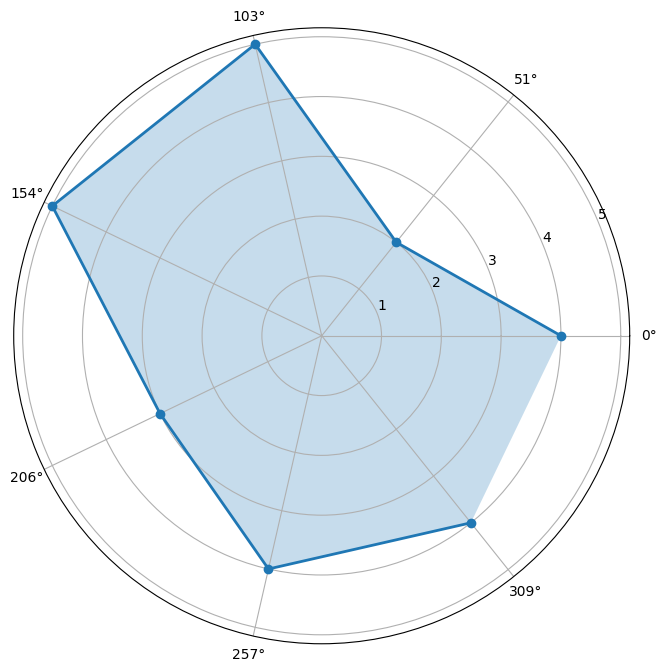

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your data
data = {
    'Name': ['Gourmet', 'Celebrity', 'Roar', 'Skin', 'Sentiment', 'Football', 'Button'],
    'Visual': [4, 5, 2, 4, 1, 5, 4],
    'Auditory': [2, 4, 5, 1, 2, 4, 2],
    'Gustatory': [5, 1, 1, 1, 1, 1, 1],
    'Olfactory': [5, 1, 1, 1, 1, 2, 1],
    'Tactile': [3, 2, 2, 5, 2, 4, 5],
    'Interoceptive': [4, 3, 4, 5, 5, 4, 2]
}

df = pd.DataFrame(data)

# Filter the data for the word "Gourmet"
word_data = df[df['Name'] == 'Gourmet']

# Get the ratings and their labels
ratings = word_data.iloc[:, 1:].values.flatten()
rating_labels = df.columns[1:]

# Duplicate the first rating (Visual) at the end to close the circular plot
ratings = np.append(ratings, ratings[0])

# Create a list of angles for the polar plot
angles = np.linspace(0, 2 * np.pi, len(ratings), endpoint=False)

# Plotting using Seaborn styling with Matplotlib
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Plotting the radar chart
ax.plot(angles, ratings, 'o-', linewidth=2, label='Gourmet')
ax.fill(angles, ratings, alpha=0.25)

# Adding tick labels
ax.set_xticks(angles)
ax.set_xticklabels(rating_labels)

# Adding labels and formatting
ax.set_title('Sensorimotor and Action Effector Ratings for "Gourmet"')
ax.set_rlabel_position(0)
ax.set_rmax(5)
ax.set_yticklabels([])
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()
